###Problem Statement

A renowned bank has been facing a challenge: the percentage of credit card customers who defaulted payments has increased from 5% to 9%. This required them to thoroughly review the existing application screening process. Based on the results of the same, they believe that one of the reasons for the increase in defaulters is a lapse in process adherence. This might have been due to a rise in the volume of credit card applications, which is up by 35% in the past three months.

To accurately assess the risk involved and approve credit to financially reliable applicants, the bank wants to introduce a machine learning-based solution. As a part of the Data Science team of the bank, you have been tasked with analyzing the data of past applicants, identifying patterns in it, building an ML model to accurately determine the applicants' credibility, and identifying the attributes that drive eligibility for availing credit cards. The end goal is to use this ML-based solution to streamline the initial screening process to efficiently and accurately assess the creditworthiness of applications.

### Business Insights

*    The most impactful feautres in this data set are: Age, Credit Score, Annual Income, PriorDefault, and Employed.
*    The median age of approved applicants is 37.
*    The apporoved applicant has a median credit score of 729.
*    The approved applicant has a median annual income of 76K.
*    A majority of approved applicants are employed and don't have a prior default.
*    The trained, optimized model can predict if an applicant will be approved with an 82% accuracy.


### Data Dictionary

1. **Gender:** The gender of the applicant

2. **Age:** The age of the applicant

3. **PriorDefault:** An indicator of the prior default history of the applicant

    - 0 represents no prior defaults
    - 1 represents at least one prior default

4. **CreditScore:** The current credit score of the applicant

5. **Annual Income:** The annual income of the applicant (in thousand dollars) based on their last drawn salary

6. **Employed:** An indicator of whether the applicant is currently employed

    - 1 represents currently employed
    - 0 represents currently not employed

7. **Approval:** Whether the credit card application was approved (Yes/No)

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

In [4]:
df = pd.read_csv("/content/credit_card_approval.csv")

## EDA

In [3]:
df.head()

,Age,Credit Score,Annual Income,PriorDefault,Employed,Approval,Gender
0,33.541537,678.0,53.984881,0,1,No,Male
1,24.808335,624.0,41.131160,1,0,No,Male
2,23.342078,671.0,33.012298,1,1,No,Female
3,29.987970,671.0,66.942232,1,1,No,Female
4,29.707443,630.0,116.613468,1,1,No,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2500 non-null   float64
 1   Credit Score   2500 non-null   float64
 2   Annual Income  2500 non-null   float64
 3   PriorDefault   2500 non-null   int64  
 4   Employed       2500 non-null   int64  
 5   Approval       2500 non-null   object 
 6   Gender         2500 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 136.8+ KB


*   None of the columns have missing values
*   All of them appear to be the right data type.


In [ ]:
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 2500 rows and 7 columns.


In [ ]:
df.describe()

,Age,Credit Score,Annual Income,PriorDefault,Employed
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,37.014342,703.019600,76.421887,0.300000,0.702000
std,9.814617,60.102094,32.942672,0.458349,0.457471
min,16.400000,342.000000,4.870000,0.000000,0.000000
25%,29.788468,666.000000,51.732313,0.000000,0.000000
50%,35.487664,713.000000,71.695510,0.000000,1.000000
75%,42.573775,747.000000,97.244651,1.000000,1.000000
max,78.200000,837.000000,204.400000,1.000000,1.000000


*   There are a few outliers in the Age, Annual Income and Credit Score column.


In [ ]:
df.duplicated().sum()

0

This dataset has no duplicates

### Categorical Memebers check

In [5]:
cat_cols = list()
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  print(df[col].value_counts())

Approval
Yes    1401
No     1099
Name: count, dtype: int64
Gender
Female    1251
Male      1196
Others      53
Name: count, dtype: int64


For the categorical features there are no mispelled or unexpected entries.

## Univariate Analysis

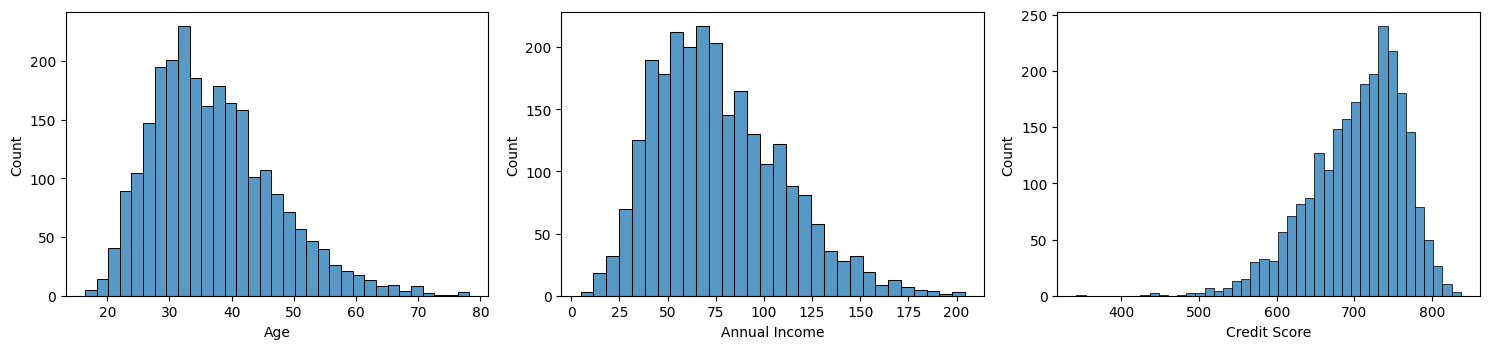

In [6]:
plt.figure(figsize=(15,10))
num_cols = ['Age', 'Annual Income', 'Credit Score']

for i, feature in enumerate(num_cols):
  plt.subplot(3, 3, i+1)
  sns.histplot(data=df, x=feature)

plt.tight_layout();

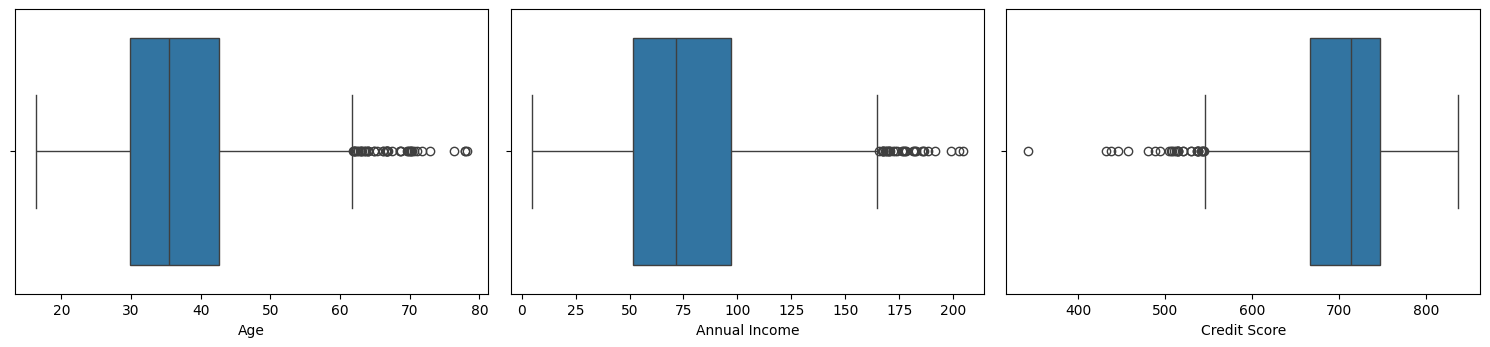

In [7]:
plt.figure(figsize=(15,10))
num_cols = ['Age', 'Annual Income', 'Credit Score']

for i, feature in enumerate(num_cols):
  plt.subplot(3, 3, i+1)
  sns.boxplot(data=df, x=feature)

plt.tight_layout();



*   Age and Annual Income are both right skewed.
*   Credit Score is left skewed.
*   These features have several outliers; however, these outliers might make it easier for the Decision Tree to classify an applicant.



### Approval

Approval
Yes    56.04
No     43.96
Name: proportion, dtype: float64 



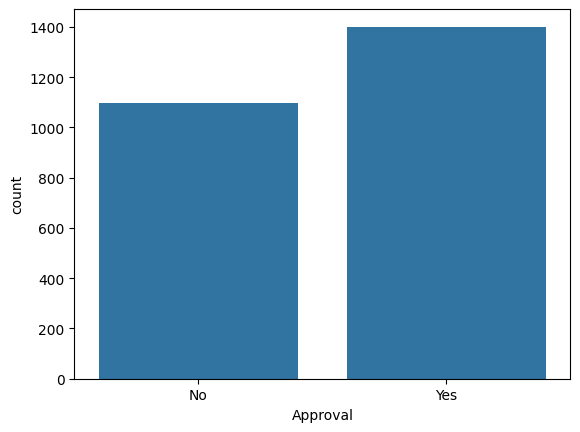

In [8]:
print(100*df['Approval'].value_counts(normalize=True), '\n')

sns.countplot(data=df, x='Approval');



*   Credit card applicants are approved 56% of the time.



### PriorDefault

PriorDefault
0    70.0
1    30.0
Name: proportion, dtype: float64 



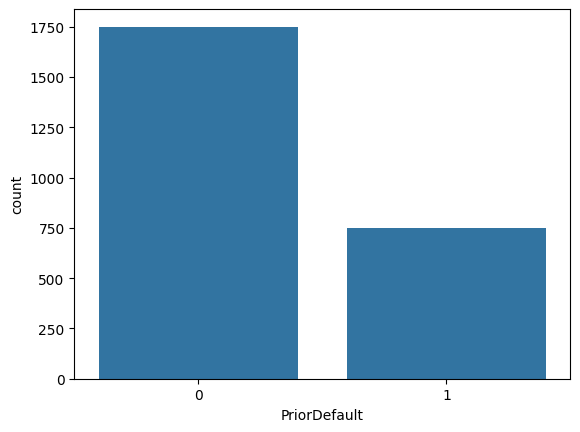

In [ ]:
print(100*df['PriorDefault'].value_counts(normalize=True), '\n')

sns.countplot(data=df, x='PriorDefault');



*   70% of the applicants have no prior defaults.



### Employed

Employed
1    70.2
0    29.8
Name: proportion, dtype: float64


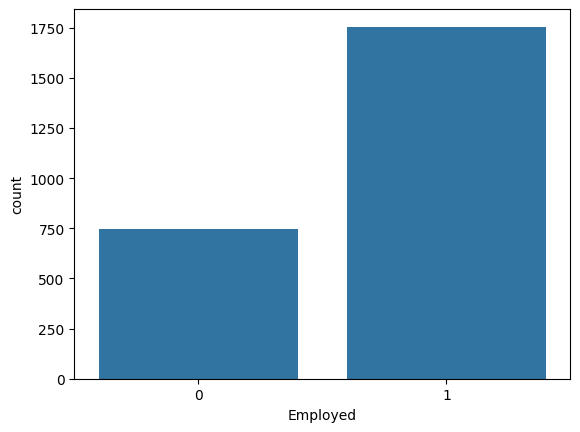

In [ ]:
print(100*df['Employed'].value_counts(normalize=True))

sns.countplot(data=df, x='Employed');



*   70% of applicants are employed.



### Gender

Gender
Female    50.04
Male      47.84
Others     2.12
Name: proportion, dtype: float64 



<Axes: xlabel='Gender', ylabel='count'>

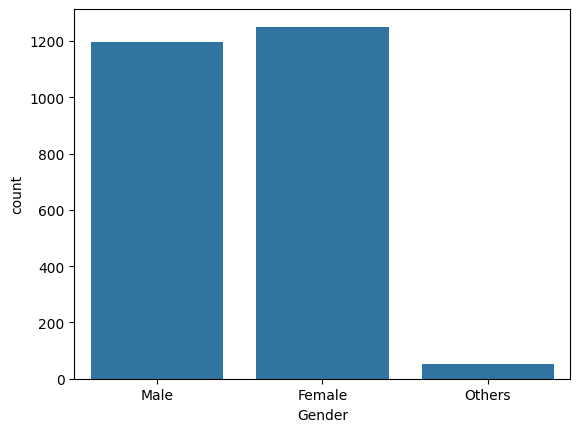

In [ ]:
print(100*df['Gender'].value_counts(normalize=True), '\n')

sns.countplot(data=df, x='Gender')


*    50% of applicants are female.





## Bivariate Aanalysis

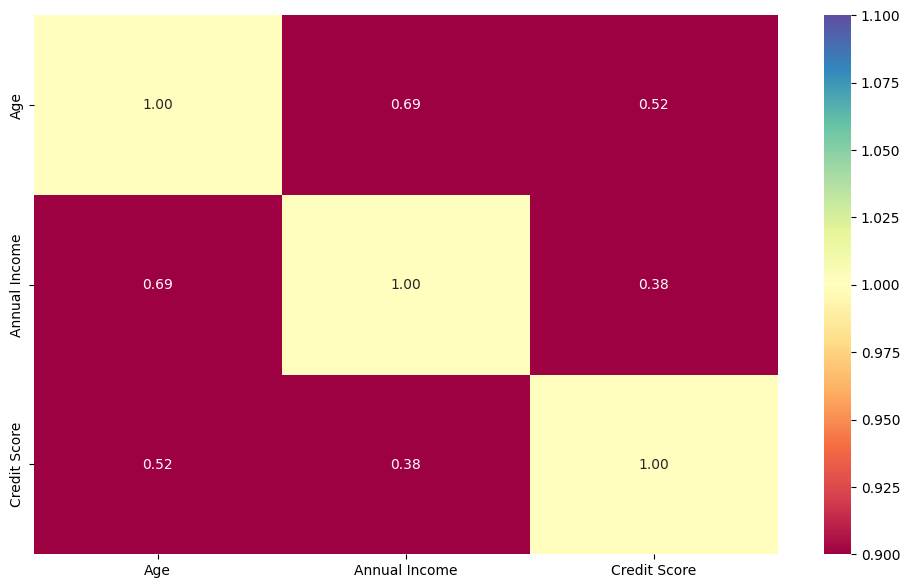

In [ ]:
plt.figure(figsize=(12,7))

sns.heatmap(df[num_cols].corr(), annot=True, vmin=1, vmax=1, fmt='.2f', cmap='Spectral');

* The age of the applicant and their annual income has a strong positive coorelation.
* The correlation between annual income and credit score is weak but positive.

### Age vs Approval

<Axes: xlabel='Age', ylabel='Count'>

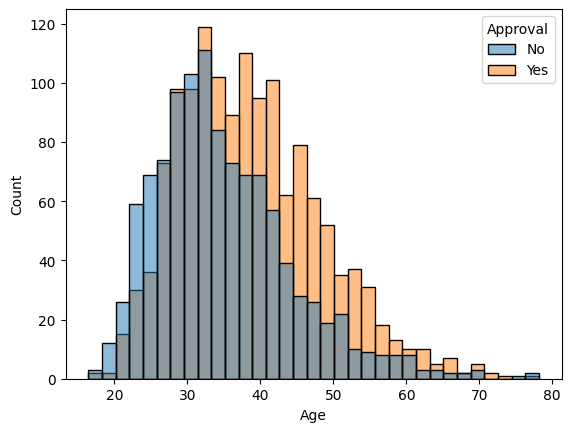

In [ ]:
sns.histplot(data=df, x='Age', hue='Approval')

<Axes: xlabel='Age'>

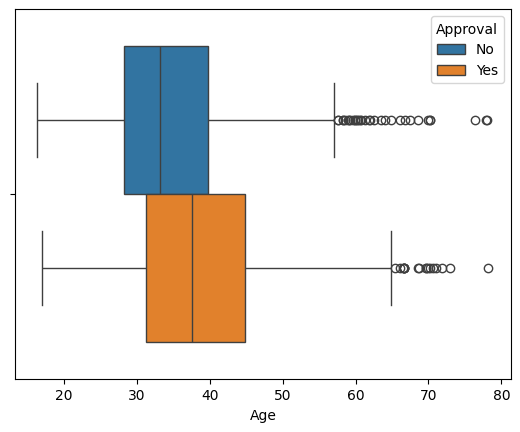

In [ ]:
sns.boxplot(data=df, x='Age', hue='Approval')

In [ ]:
print(df['Age'].groupby(df['Approval']).median().reset_index(name='median_age'))

  Approval  median_age
0       No   33.145726
1      Yes   37.530928


The median age of approved applicants is slightly higher.

### PriorDefault vs Approval

<Axes: xlabel='PriorDefault', ylabel='count'>

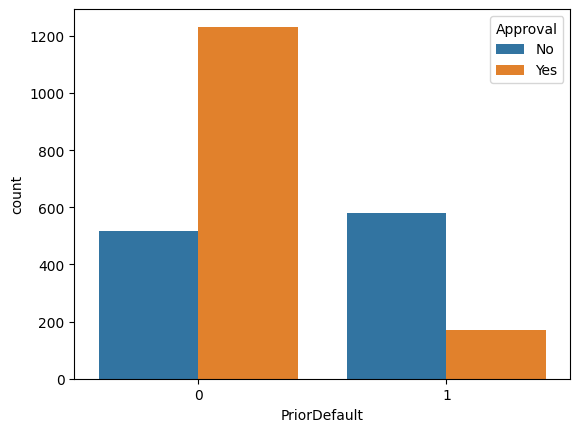

In [ ]:
sns.countplot(data=df, x='PriorDefault', hue='Approval')

Applicants with no prior defaults are much more likely to be approved than ones that have a prior default.

### Credit Score vs Approval

<Axes: xlabel='Credit Score', ylabel='Count'>

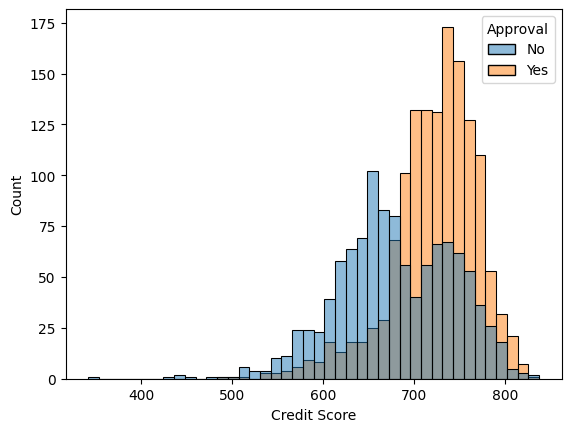

In [ ]:
sns.histplot(data=df, x='Credit Score', hue='Approval')

In [ ]:
print(df['Credit Score'].groupby(df['Approval']).median().reset_index(name='median_CS'))

  Approval  median_CS
0       No      673.0
1      Yes      729.0


Approved applicants have a much higher median credit score than declined ones.


### Annual Income vs Approval

<Axes: xlabel='Annual Income', ylabel='Count'>

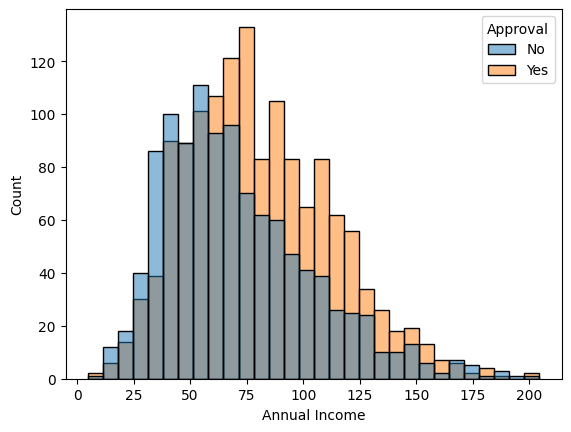

In [ ]:
sns.histplot(data=df, x='Annual Income', hue='Approval')

In [ ]:
print(df['Annual Income'].groupby(df['Approval']).median().reset_index(name='median_AI'))

  Approval  median_AI
0       No  64.668257
1      Yes  76.544692


Approved applicants have a higher median income than declined ones.

### Employed vs Approval

<Axes: xlabel='Employed', ylabel='count'>

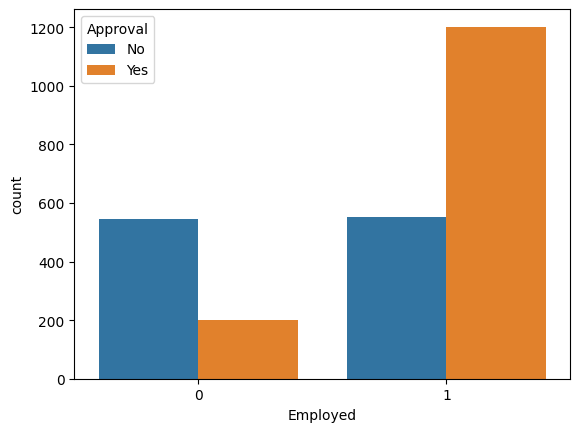

In [ ]:
sns.countplot(data=df, x='Employed', hue='Approval')

Applicants that are employed are more likely to be apporved than ones that are not.

### Gender vs Approval

<Axes: xlabel='Gender', ylabel='count'>

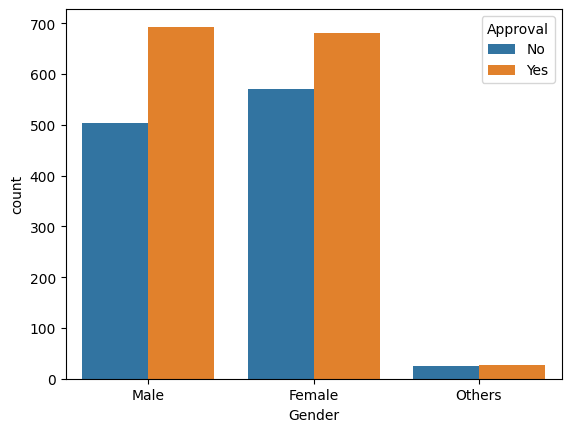

In [5]:
sns.countplot(data=df, x='Gender', hue='Approval')

All genders are apporved at about the same rate; however, female applicants are denied at a slightly higher rate.

## Data Preparation for Modeling

In [9]:
X = df.drop(['Approval'],axis=1)
y = df['Approval']

### Create dummy variaables

In [10]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first=True
  )

#Specify the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,Age,Credit Score,Annual Income,PriorDefault,Employed,Gender_Male,Gender_Others
0,33.541537,678.0,53.984881,0.0,1.0,1.0,0.0
1,24.808335,624.0,41.131160,1.0,0.0,1.0,0.0
2,23.342078,671.0,33.012298,1.0,1.0,0.0,0.0
3,29.987970,671.0,66.942232,1.0,1.0,0.0,0.0
4,29.707443,630.0,116.613468,1.0,1.0,1.0,0.0


In [11]:
#Simple one hot enconding for the Y variable.
y = y.map({'Yes':1, 'No':0})
y.head()

,Approval
0,0
1,0
2,0
3,0
4,0


In [16]:
#spliting the data in training and test sets.
#Stratify so that key features are represented proportionally in the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

## Model Building

###Decision Tree (default)

In [17]:
dtree1 = DecisionTreeClassifier(random_state=42)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation

In [13]:
def model_eval(model, predictors, target):
  '''
  Model to calculate and print out evaluation metrics.

  model - the classifier used
  predictors - x features
  target - y feature
  '''
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred)
  precision = precision_score(target,pred)
  recall = recall_score(target,pred)
  f1 = f1_score(target, pred)

  df_eval = pd.DataFrame(
      {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
      index=[0],
  )

  return df_eval

In [14]:

def conf_matrix_plot(model, predictors, target):
  '''
  Function to plot the confusion matrix of the decision tre.

  model - the classifier used
  predictors - x feature
  target - y feature
  '''

  #predict the y var.
  y_pred = model.predict(predictors)

  #Compute the confusion matrix
  cm = confusion_matrix(target, y_pred)

  #Create cell labels for the matrix with count and percentage.
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item)+"\n{0:.2%}".format(item/cm.flatten().sum())]
          for item in cm.flatten()
      ]
  ).reshape(2,2)

  plt.figure(figsize=(6,4))

  sns.heatmap(cm, annot=labels, fmt="")

  plt.ylabel("True label")
  plt.xlabel("Predicted label")

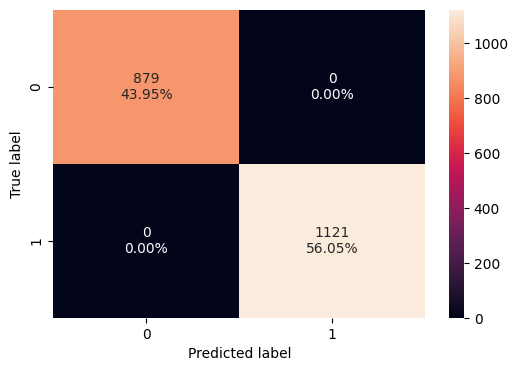

In [18]:
conf_matrix_plot(dtree1, X_train, y_train)

In [19]:
dtree1_train_perf = model_eval(
    dtree1, X_train, y_train
)

dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


According to the confusion matrix the model produced no false positives or false negatives. This indicates that the model overfit on the training data.

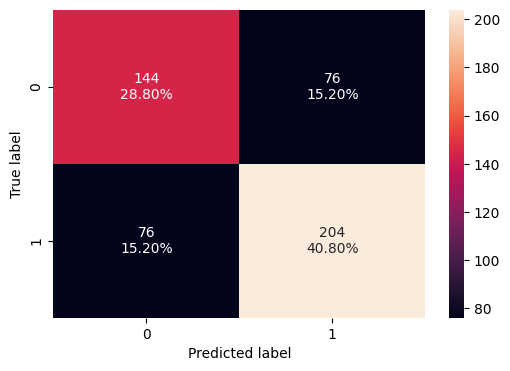

In [20]:
conf_matrix_plot(dtree1, X_test, y_test)

When the model is applied to the test data it made several wrong predictions. The false negative and false positive scores are both 15.2%

In [21]:
dtree1_train_perf = model_eval(
    dtree1, X_test, y_test
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,0.696,0.728571,0.728571,0.728571


In [22]:
print(dtree1.score(X_test, y_test))

0.696


The model clearly overfit on the training data, and is not ready to be generalized to new data.

## Model Optimization

### Pre-prunning Decision Tree

In [23]:
dtr = DecisionTreeClassifier()

In [24]:
rfe3 = RFE(estimator = dtr)

In [25]:
pipeline = Pipeline(steps=[('rfe', rfe3), ('dt', dtr)])

In [26]:
max_depth_values = np.arange(2,11,2)
max_leaf_nodes_values = np.arange(10,51,10)
min_samples_split_value = np.arange(10,51,10)
max_features = np.arange(0.2,0.8,0.2)

params_dt = {
    'dt__max_depth': max_depth_values,
    'dt__max_leaf_nodes' : max_leaf_nodes_values,
    'dt__min_samples_split' : min_samples_split_value,
    'dt__max_features' : max_features,
    'rfe__n_features_to_select': [1, 2, 3, 4, 5],
}


In [27]:
#Init Kfold obj
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Init the GS obj.
grid_dt2 = GridSearchCV(
    estimator=pipeline,
    param_grid = params_dt,
    scoring='accuracy',
    cv=kf
)

In [28]:
grid_dt2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rfe',
                                        RFE(estimator=DecisionTreeClassifier())),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': array([ 2,  4,  6,  8, 10]),
                         'dt__max_features': array([0.2, 0.4, 0.6, 0.8]),
                         'dt__max_leaf_nodes': array([10, 20, 30, 40, 50]),
                         'dt__min_samples_split': array([10, 20, 30, 40, 50]),
                         'rfe__n_features_to_select': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [34]:
#Returns the optimized hyperparameters from the model.
print("Best parameters found: ", grid_dt2.best_params_)

#Return the training accuracy of the optimized model.
print("Best score achieved: ", grid_dt2.best_score_)

Best parameters found:  {'dt__max_depth': 2, 'dt__max_features': 0.8, 'dt__max_leaf_nodes': 10, 'dt__min_samples_split': 40, 'rfe__n_features_to_select': 5}
Best score achieved:  0.7855


In [30]:
print(accuracy_score(y_test, grid_dt2.predict(X_test)))

0.822


The model had an 82% accuracy when making predictions for the test set.

In [56]:
# Get best model from the grid obj.
best_pipeline = grid_dt2.best_estimator_

# Get the rfe obj from the pipeline.
rfe_step = best_pipeline.named_steps['rfe']

#get kept features from rfe.
selected_columns = df.columns[rfe_step.support_]

print('The most important features in this data set are:', end='\n')
print(selected_columns)

The most important features in this data set are:
Index(['Age', 'Credit Score', 'Annual Income', 'PriorDefault', 'Employed'], dtype='object')


## Model Evaluation

In [52]:
dtree1_train_perf = model_eval(
    dtree1, X_test, y_test
)
print('Default decision tree model performance on the test data', end='\n\n')
dtree1_train_perf

Default decision tree model performance on the test data



,Accuracy,Recall,Precision,F1
0,0.696,0.728571,0.728571,0.728571


In [54]:
grid_dt_train_eval = model_eval(
    grid_dt2, X_train, y_train
)
print('Optimized decision tree model performance on the train data', end='\n\n')
grid_dt_train_eval

Optimized decision tree model performance on the train data



,Accuracy,Recall,Precision,F1
0,0.7855,0.741302,0.856701,0.794835


In [53]:
grid_dt_test_eval = model_eval(
    grid_dt2, X_test, y_test
)
print('Optimized decision tree model performance on the test data', end='\n\n')
grid_dt_test_eval

Optimized decision tree model performance on the test data



,Accuracy,Recall,Precision,F1
0,0.822,0.785714,0.883534,0.831758


By optimizing the hyperparameters and only using the most impactful features the model is no longer overfitting. This is demostrated in that the performance metrics of the train and test sets are very close.

##Visulization of the Optimized Tree

In [59]:
best_pipeline = grid_dt2.best_estimator_
grid_dt2_tree_model = best_pipeline.named_steps['dt']

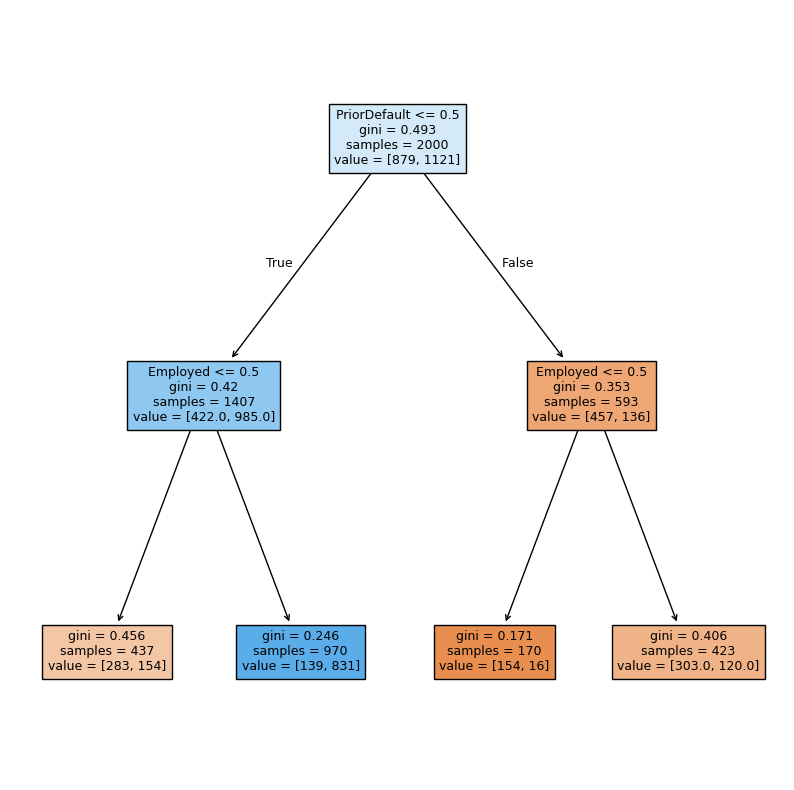

In [62]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 10))

# plotting the decision tree
out = tree.plot_tree(
    grid_dt2_tree_model,            # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [6]:
!jupyter nbconvert --to html /content/CreditCardApproval.ipynb

[NbConvertApp] Converting notebook /content/CreditCardApproval.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 17 image(s).
[NbConvertApp] Writing 896195 bytes to /content/CreditCardApproval.html
